## Esercitazione 7 -  9 Aprile 2024

Scrivere la function `NewtonRaphson_corde.py`, che implementa il metodo di Newton-Raphson con la variante delle corde
per il calcolo della soluzione di un sistema di equazioni non lineari. 

    Tale function
deve assumere come dati in input:
- fname: nome della funzione vettoriale di cui calcolare lo zero;
- JacName: nome della funzione che calcola lo J acobiano della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.
In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
effettuate, nit.

Scrivere la function `NewtonRaphson_sham.py`, che implementa il metodo di Newton-Raphson con la variante di Shamanskii
per il calcolo della soluzione di un sistema di equazioni non lineari. 

    Tale function
deve assumere come dati in input:
- fname: nome della funzione vettoriale di cui calcolare lo zero;
- JacName: nome della funzione che calcola lo J acobiano della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.
In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
effettuate, nit.

# TRACCIA DEGLI ESERCIZI:
Risolvere i seguenti tre sistemi non lineari:
- SISTEMA 1: 
    - 2x0-cos(x1)=0
    - sin(x0)+2x1=0

- SISTEMA 2:
    - x0^2+x1^2-9=0
    - x0^2+x1*2-2=0

- SISTEMA 3:
    - 4x0^2+x_1^2^=4
    - x0+x1=sin(x0-x1)

utilizzando il metodo di Newton Raphson, la variante delle corde e la variante di Shamanskii.
Confrontare per ciascun metodo il grafico dell'errore relativo tra due iterati successivi.

# APPUNTI VARI: 
Per scrivere il sistema in Python, vado a definire una lambda function che mi comprenda le funzioni del sistema:
- F1 = lambda x: np.array([2*x0 - np.cos(x1), np.sin(x0) + 2*x1])

Lo Jacobiano del sistema è definito come: 
- [(sigma(f1(x))/sigma(x1), sigma(f1(x))/sigma(x2)),(sigma(f2(x))/sigma(x1), sigma(f2(x))/sigma(x2))].

Per scrivere lo Jacobiano del sistema di equazioni (del nostro caso) in Python, scrivo:
- J = lambda x: np.array([[2, np.sin(x1)], [np.cos(x0), 2]])

Poichè lo Jacobiano in formato matriciale del nostro esempio è:
- [(2, sin(x1)),(cos(x0), 2)].

Le due equazioni del sistema saranno:
- z1(x0,x1) = 2x0 - cos(x1)      (SUPERFICIE 1)
- z2(x0,x1) = sin(x0) + 2x1       (SUPERFICIE 2)

Curve di livello: prendo la superficie, scegliamo una quota, ed intersechiamo con una superficie.
Nel nostro caso le due curve di livello, di quota zero, delle due superfici calcolate in precedenza, sono date da:
- 2x0 - cos(x1) = 0
- sin(x0) + 2x1 = 0

Se si tratta di una z (un piano), il valore della funzione (un punto) apparterrà ad un prodotto cartesiano ((x,y) appartiene a [a,b]*[c,d]).
Nella griglia avrò tanti punti su cui andare a poter valutare il mio sistema di equazioni (a varie quote).
Per ogni punto che c'è nella griglia, vado a scoprire la quota di quel punto, capendo a che z si trova.
Proviamo a disegnare le curve di livello su una finestra, per avere un qualche concetto grafico di riferimento.

In [4]:
# Sistema di equazioni lineari:
#       x0 + 2 * x1 = 1
#      3x0 + 5 * x1 = 2

a = np.array([[1, 2], [3, 5]])
b = np.array([1, 2])
x = np.linalg.solve(a, b)
print(x)

[-1.  1.]


# -----------------------------------------------------------------------------------------------------------------

# ESERCIZIO 1:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [5]:
x = np.arange(-4.0, 4, 0.1)
print("Valori di x\n", x)
y = np.arange(-4.0, 4, 0.1)
print("Valori di y\n", y)

# Il metodo meshgrid ritorna una lista di matrici a partire dai vettori forniti
X, Y = np.meshgrid(x,y)

# Equazioni del 1° sistema:
Z1 = 2*X - np.cos(Y)
Z2 = np.sin(X) + 2*Y

Valori di x
 [-4.00000000e+00 -3.90000000e+00 -3.80000000e+00 -3.70000000e+00
 -3.60000000e+00 -3.50000000e+00 -3.40000000e+00 -3.30000000e+00
 -3.20000000e+00 -3.10000000e+00 -3.00000000e+00 -2.90000000e+00
 -2.80000000e+00 -2.70000000e+00 -2.60000000e+00 -2.50000000e+00
 -2.40000000e+00 -2.30000000e+00 -2.20000000e+00 -2.10000000e+00
 -2.00000000e+00 -1.90000000e+00 -1.80000000e+00 -1.70000000e+00
 -1.60000000e+00 -1.50000000e+00 -1.40000000e+00 -1.30000000e+00
 -1.20000000e+00 -1.10000000e+00 -1.00000000e+00 -9.00000000e-01
 -8.00000000e-01 -7.00000000e-01 -6.00000000e-01 -5.00000000e-01
 -4.00000000e-01 -3.00000000e-01 -2.00000000e-01 -1.00000000e-01
  3.55271368e-15  1.00000000e-01  2.00000000e-01  3.00000000e-01
  4.00000000e-01  5.00000000e-01  6.00000000e-01  7.00000000e-01
  8.00000000e-01  9.00000000e-01  1.00000000e+00  1.10000000e+00
  1.20000000e+00  1.30000000e+00  1.40000000e+00  1.50000000e+00
  1.60000000e+00  1.70000000e+00  1.80000000e+00  1.90000000e+00
  2.00000000

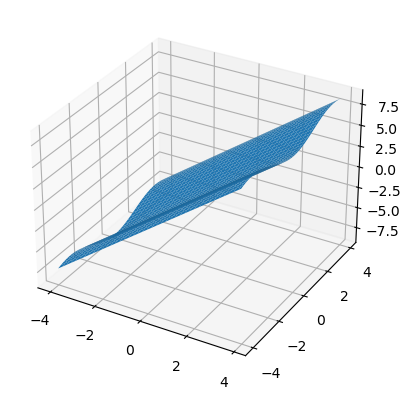

In [6]:
# GRAFICO DELLA PRIMA EQUAZIONE DEL SISTEMA:
fig = plt.figure()
# Il metodo add_subplot permette di aggiungere una serie di assi cartesiani allo schema
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X,Y,Z1)
plt.show()

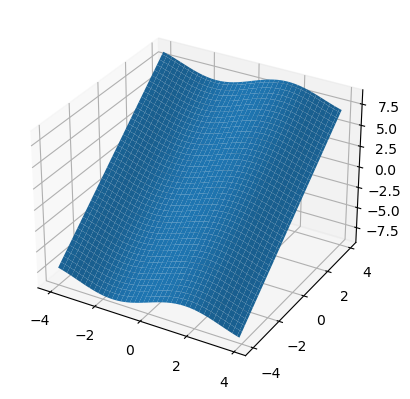

In [7]:
# GRAFICO DELLA SECONDA EQUAZIONE DEL SISTEMA:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X,Y,Z2)
plt.show()

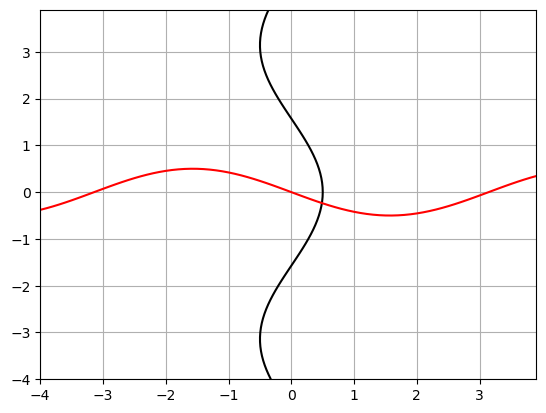

In [8]:
# Il metodo contour permette di mostrare le curve di livello.
# Vado a selezionare solamente le curve di livello di quota 0:
plt.contour(X,Y,Z1, levels = [0], colors = 'black')
plt.contour(X,Y,Z2, levels = [0], colors = 'red')
plt.grid(True)
plt.show()

# DEFINIZIONE DELLE FUNZIONI:

In [39]:
# METODO DI NEWTON RAPHSON (BASE):
def my_newtonSys(fun, jac, x0, tolx, tolf, nmax):
    matrice_jacobiana = jac(x0)
    
    if np.linalg.det(matrice_jacobiana) == 0:
        print("Lo jacobiano in x0 è nullo")
        return None, None, None
    
    it = 1
    # La funzione linalg.solve calcola la soluzione “esatta”, x , dell'equazione 
    # di matrice lineare ben determinata, ovvero di rango completo, ax = b
    # Dato che J(x)*s = -F(x), si avrà che:
    s = -np.linalg.solve(matrice_jacobiana, fun(x0))        
    x1 = x0 + s
    fx1 = fun(x1)
    
    # Rappresenta l'errore relativo fra due iterati successivi
    # Rappresenta l'errore relativo fra due iterati successivi
    if np.linalg.norm(x1,1) != 0:
        Xm = [np.linalg.norm(s,1)/np.linalg.norm(x1,1)]
    else:
        Xm = [0]
    
    # Sappiamo che x1=x0+s, ma allora calcolare la norma è uguale a fare:
    # ||x1-x0||/||x1|| = ||s||/||x1||, perciò si ha ||s|| > tol||x1||
    while it <= nmax and np.linalg.norm(fx1, 1) >= tolf and np.linalg.norm(s,1) >= tolx*np.linalg.norm(x1,1):
        x0 = x1
        matrice_jacobiana = jac(x0)
        
        if np.linalg.det(matrice_jacobiana) == 0:
            print("Jacobiano in x0 è nullo")
            return None, None, None
        
        it = it + 1
        s = -np.linalg.solve(matrice_jacobiana, fun(x0))
        x1 = x0 + s
        fx1 = fun(x1)
        
        # Aggiungo l'errore calcolato alla lista degli errori:
        # Rappresenta l'errore relativo fra due iterati successivi
        if np.linalg.norm(x1,1) != 0:
            Xm.append(np.linalg.norm(s,1)/np.linalg.norm(x1,1))
        else:
            Xm.append(0)
        
    return x1, it, Xm

# METODO DI NEWTON RAPHSON (CORDE):
def my_newtonSys_Corde(fun, jac, x0, tolx, tolf, nmax):
    matrice_jacobiana = jac(x0)
    
    if np.linalg.det(matrice_jacobiana) == 0:
        print("Lo jacobiano in x0 è nullo")
        return None, None, None
    
    it = 1
    s = -np.linalg.solve(matrice_jacobiana, fun(x0))
    x1 = x0 + s
    fx1 = fun(x1)
    
    # Rappresenta l'errore relativo fra due iterati successivi
    Xm = [np.linalg.norm(s,1)/np.linalg.norm(x1,1)]
    
    # Sappiamo che x1=x0+s, ma allora calcolare la norma è uguale a fare:
    # ||x1-x0||/||x1|| = ||s||/||x1||, perciò si ha ||s|| > tol||x1||
    while it <= nmax and np.linalg.norm(fx1, 1) >= tolf and np.linalg.norm(s,1) >= tolx*np.linalg.norm(x1,1):
        x0 = x1
        it = it + 1
        s = -np.linalg.solve(matrice_jacobiana, fun(x0))
        x1 = x0 + s
        fx1 = fun(x1)
        
        # Aggiungo l'errore calcolato alla lista degli errori:
        Xm.append(np.linalg.norm(s,1)/np.linalg.norm(x1,1))
        
    return x1, it, Xm

# METODO DI NEWTON RAPHSON (SHAMANSKI):
def my_newtonSys_sham(fun, jac, x0, tolx, tolf, nmax):
    matrice_jacobiana = jac(x0)
    N = 4
    
    if np.linalg.det(matrice_jacobiana) == 0:
        print("Lo jacobiano in x0 è nullo")
        return None, None, None
    
    it = 1
    s = -np.linalg.solve(matrice_jacobiana, fun(x0))
    x1 = x0 + s
    fx1 = fun(x1)
    
    # Rappresenta l'errore relativo fra due iterati successivi
    Xm = [np.linalg.norm(s,1)/np.linalg.norm(x1,1)]
    
    # Sappiamo che x1=x0+s, ma allora calcolare la norma è uguale a fare:
    # ||x1-x0||/||x1|| = ||s||/||x1||, perciò si ha ||s|| > tol||x1||
    while it <= nmax and np.linalg.norm(fx1, 1) >= tolf and np.linalg.norm(s,1) >= tolx*np.linalg.norm(x1,1):
        x0 = x1
        
        if it%N == 0:
            matrice_jacobiana = jac(x0)
            if np.linalg.det(matrice_jacobiana) == 0:
                print("Jacobiano in x0 è nullo")
                return None, None, None
        
        it = it + 1
        s = -np.linalg.solve(matrice_jacobiana, fun(x0))
        x1 = x0 + s
        fx1 = fun(x1)
        
        # Aggiungo l'errore calcolato alla lista degli errori
        Xm.append(np.linalg.norm(s,1)/np.linalg.norm(x1,1))
        
    return x1, it, Xm

In [40]:
# Definizione del sistema di equazioni:
F = lambda x: np.array([2*x[0] - np.cos(x[1]), np.sin(x[0]) + 2*x[1]])

# DEFINIZIONE DELLO JACOBIANO:
J = lambda x: np.array([[2, np.sin(x[1])], [np.cos(x[0]), 2]])

# NEWTON BASE:
x0 = np.array([-1,1])
tolx = 1e-10
tolf = 1e-10
nmax = 100
zeroN, itN, XmN = my_newtonSys(F, J, x0, tolx, tolf, nmax)
print("Soluzioni Newton Base\n:", zeroN)
print("Numero iterazioni Newton Base\n:", itN)

# NEWTON CORDE:
x0 = np.array([-1,1])
tolx = 1e-10
tolf = 1e-10
nmax = 100
zeroNC, itNC, XmNC = my_newtonSys_Corde(F, J, x0, tolx, tolf, nmax)
print("Soluzioni Newton Corde\n:", zeroNC)
print("Numero iterazioni Corde\n:", itNC)

# NEWTON SHAMANSKI:
x0 = np.array([-1,1])
tolx = 1e-10
tolf = 1e-10
nmax = 100
zeroNS, itNS, XmNS = my_newtonSys_sham(F, J, x0, tolx, tolf, nmax)
print("Soluzioni Newton Shamanski\n:", zeroNS)
print("Numero iterazioni Shamanski\n:", itNS)

Soluzioni Newton Base
: [ 0.48640515 -0.2337255 ]
Numero iterazioni Newton Base
: 5
Soluzioni Newton Corde
: [ 0.48640515 -0.2337255 ]
Numero iterazioni Corde
: 21
Soluzioni Newton Shamanski
: [ 0.48640515 -0.2337255 ]
Numero iterazioni Shamanski
: 8


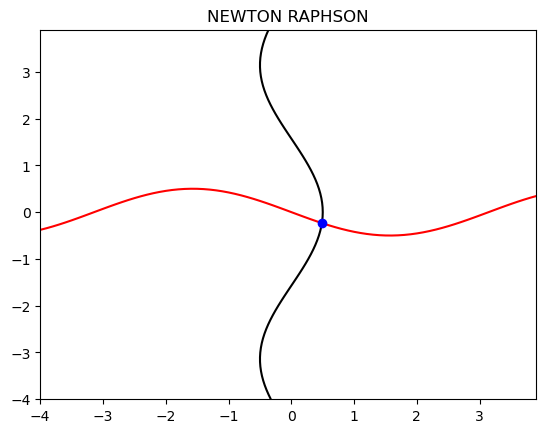

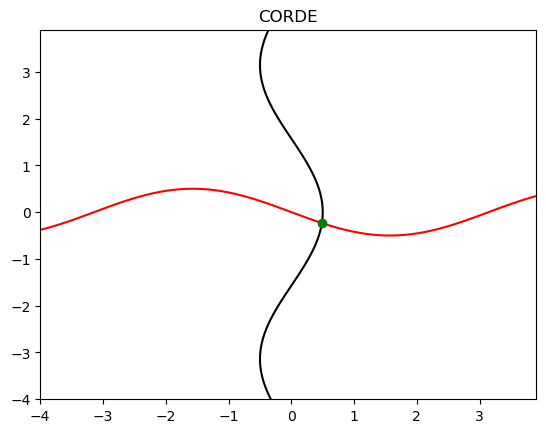

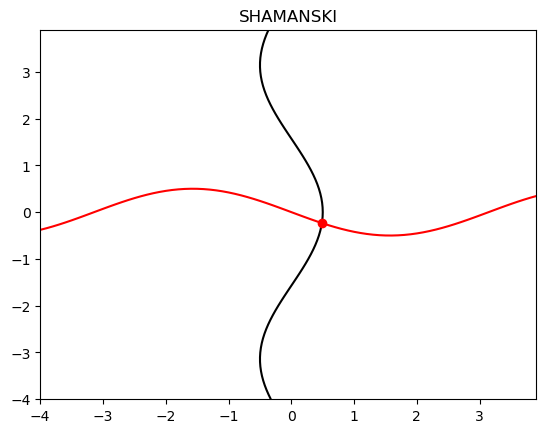

In [41]:
# NEWTON RAPHSON:
plt.contour(X,Y,Z1,levels = [0], colors = 'black')
plt.contour(X,Y,Z2,levels = [0], colors = 'red')
plt.plot(zeroN[0], zeroN[1], 'bo')
plt.title("NEWTON RAPHSON")
plt.show()

# CORDE:
plt.contour(X,Y,Z1,levels = [0], colors = 'black')
plt.contour(X,Y,Z2,levels = [0], colors = 'red')
plt.plot(zeroNC[0], zeroNC[1], 'go')
plt.title("CORDE")
plt.show()

# SHAMANSKI:
plt.contour(X,Y,Z1,levels = [0], colors = 'black')
plt.contour(X,Y,Z2,levels = [0], colors = 'red')
plt.plot(zeroNS[0], zeroNS[1], 'ro')
plt.title("SHAMANSKI")
plt.show()

[0 1 2 3 4]
[3.671341894358267, 0.5626690258032843, 0.02733839748461898, 6.392449967727572e-05, 2.8695937041566404e-10]


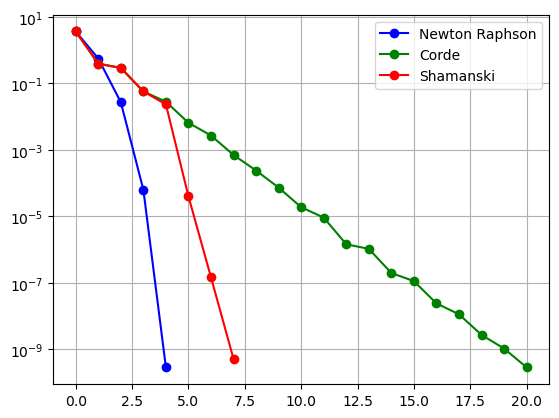

In [42]:
# Grafico dell'andamento degli errori:
print(np.arange(0,5))
print(XmN)
plt.semilogy(np.arange(0, itN), XmN, '-ob')
plt.semilogy(np.arange(0, itNC), XmNC, '-og')
plt.semilogy(np.arange(0, itNS), XmNS, '-or')
plt.legend(("Newton Raphson", "Corde", "Shamanski"))
plt.grid(True)

# -----------------------------------------------------------------------------------------------------------------

# Esercizio 2
Scrivere la function `NewtonRaphson_minimo.py`, che implementa il metodo di Newton-Raphson con la variante delle corde
per il calcolo del minimo assoluto (relativo) di una funzione non lineare.

    Tale function
deve assumere come dati in input:
- grad_name: nome della  funzione vettoriale  che contine il gradiente della funzione di cui calcolare lo zero;
- Hess_name: nome della funzione che calcola l' Hessiana della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.
In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
effettuate, nit.



### RIFORMULAZIONE DEL METODO DI NEWTON RAPHSON PER IL CALCOLO DEL MINIMO DI UNA FUNZIONE:
def my_newtonRaphsonMin(gradName, hessName, x0, tolx, tolf, nmax):
    it = 0
    minimo = x0
    gradiente = gradName(minimo) ## Funzione
    hessiana = hessName(minimo) ## Jacobiana
    
    if np.linalg.det(hessiana) == 0:
        print("L'hessiana in x0 è nullo")
        return None, None
    
    it = 1
    delta = -np.linalg.solve(hessiana, gradiente)        
    minimo = minimo + delta
    gradiente = gradName(minimo)
    
    # Rappresenta l'errore relativo fra due iterati successivi
    if np.linalg.norm(minimo,1) != 0:
        Xm = [np.linalg.norm(delta,1)/np.linalg.norm(minimo,1)]
    else:
        Xm = [0]
    
    while it <= nmax and np.linalg.norm(gradiente, 1) >= tolf and np.linalg.norm(delta,1) >= tolx*np.linalg.norm(minimo,1):
        hessiana = hessName(minimo)
        
        if np.linalg.det(hessiana) == 0:
            print("L'hessiana in x0 è nullo")
            return None, None
        
        it = it + 1
        delta = -np.linalg.solve(hessiana, gradiente)
        minimo = minimo + delta
        gradiente = gradName(minimo)
        
        # Aggiungo l'errore calcolato alla lista degli errori:
        if np.linalg.norm(minimo,1) != 0:
            Xm.append(np.linalg.norm(delta,1)/np.linalg.norm(minimo,1))
        else:
            Xm.append(0)
        
    return minimo, it, Xm


In [67]:
# METODO DI NEWTON RAPHSON (Calcolo del minimo di una funzione):
def my_NewtonRaphson_minimo(gradName, hessName, x0, tolx, tolf, Nmax):
    gradiente = gradName(minimo)
    hessiana = hessName(minimo)
    x1, itN, XmN = my_newtonSys(gradName, hessName, x0, tolx, tolf, Nmax) 
    return x1, itN, XmN

In [107]:
# DEFINIZIONE DELL'EQUAZIONE:
#       f(x0,x1) = x^2 + y^2 + 3x + 5xy
G = lambda x: np.array([2*x[0] + 3 + 5*x[1], 2*x[1] + 5*x[0]])

# DEFINIZIONE DELLA MATRICE HESSIANA:
H = lambda x: np.array([[2.0, 5], [5, 2]])

# Definizione degli argomenti della funzione e chiamata corrispondente:
x0 = np.array([-1,1])
tolx = 1e-10
tolf = 1e-10
nmax = 100
minimo, it, Xm = my_NewtonRaphson_minimo(G, H, x0, tolx, tolf, nmax)
print("Minimo della funzione\n:", minimo)
print("Numero delle iterazioni\n:", it)

Minimo della funzione
: [ 0.28571429 -0.71428571]
Numero delle iterazioni
: 1


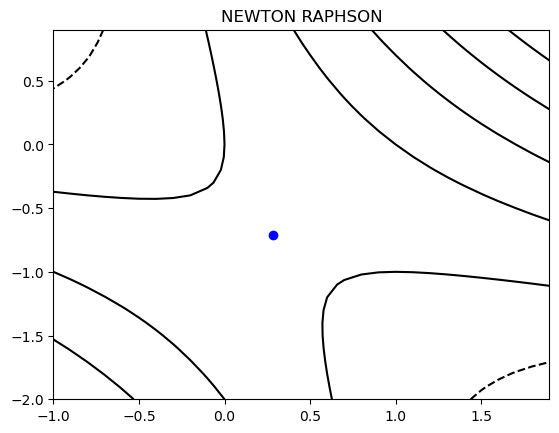

In [108]:
x = np.arange(-1.0, 2, 0.1)
y = np.arange(-2.0, 1, 0.1)

# Il metodo meshgrid ritorna una lista di matrici a partire dai vettori forniti
X, Y = np.meshgrid(x,y)

# Equazione:
Z1 = X*X + 3*X + Y*Y + 5*X*Y  


plt.contour(X,Y,Z1, colors = 'black')
plt.plot(minimo[0], minimo[1], 'bo')
plt.title("NEWTON RAPHSON")
plt.show()

# -----------------------------------------------------------------------------------------------------------------

## Esercizio 3
Scrivere una funzione numpy che calcola la norma infinito e la norma 1 di un vettore ed una matrice  e testarla su vettori e matrici  a propria scelta. Confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

(Ricorda la formula della norma infinito e della norma 1 di una matrice
$||A||_\infty= \max_{j=1,n} \sum_{i} |a_{ij}| $
$\quad ||A||_1= \max_{i=1,n} \sum_{j} |a_{ij}| $)

In [129]:
import numpy as np

A=np.array([[4,-1,6],[2,3,-3],[1,-2,9/2]])
print("Array:\n", A)
norma1 = np.linalg.norm(A,1)
print("Norma 1:\n", norma1)
normaInf = np.linalg.norm(A,np.inf)
print("Norma infinito:\n", normaInf)

Array:
 [[ 4.  -1.   6. ]
 [ 2.   3.  -3. ]
 [ 1.  -2.   4.5]]
Norma 1:
 13.5
Norma infinito:
 11.0


In [154]:
# NORMA 1 (senza np.linalg.norm):
# Somma degli elementi in ogni colonna:
c = np.sum(np.abs(A), 0)
my_n1 = np.max(c)
print("Norma 1 senza usare la funzione:\n",my_n1)

# NORMA INFINITO (senza np.linalg.norm):
# Somma degli elementi in ogni riga:
cInf = np.sum(np.abs(A), axis=1)
my_nInf = np.max(cInf)
print("Norma infinito senza usare la funzione:\n",my_nInf)

Norma 1 senza usare la funzione:
 13.5
Norma infinito senza usare la funzione:
 11.0


In [155]:
# DEFINIZIONE DELLE FUNZIONI:
# Funzione norma 1:
def norma_uno(mat):
    return np.max(np.sum(np.abs(mat), 0))

# Funzione norma infinito:
def norma_inf(mat):
    return np.max(np.sum(np.abs(mat),1))
    
    
Array = np.array([[1.0,2],[0,0]])
Matrice = np.array([[1.0,2],[3,4]])

print("Norma 1 matrice:\n ", norma_uno(Matrice))
print("Norma 1 vettore:\n ", norma_uno(Array))
print("Norma 1 matrice:\n ", np.linalg.norm(Matrice, 1))
print("Norma 1 vettore:\n ", np.linalg.norm(Array, 1))

print("Norma infinito matrice:\n ", norma_inf(Matrice))
print("Norma infinito vettore:\n ", norma_inf(Array))
print("Norma infinito matrice:\n ", np.linalg.norm(Matrice, np.inf))
print("Norma infinito vettore:\n ", np.linalg.norm(Array, np.inf))


Norma 1 matrice:
  6.0
Norma 1 vettore:
  2.0
Norma 1 matrice:
  6.0
Norma 1 vettore:
  2.0
Norma infinito matrice:
  7.0
Norma infinito vettore:
  3.0
Norma infinito matrice:
  7.0
Norma infinito vettore:
  3.0


# -----------------------------------------------------------------------------------------------------------------

## Esercizio 4
Implementare una funzione che calcola la norma 2 di una  matrice facendo uso della funzione eigvals del pacchetto numpy.linalg, (np.linalg.eigvals(A)). Testarla sulla matrice A=np.array([[4,-1,6],[2,3,-3],[1,-2,9/2]])   e confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

In [156]:
#  NORMA 2 (senza np.linalg):
M = A.T@A
my_n2 = np.sqrt(np.max(np.abs(np.linalg.eigvals(M))))
print("Norma 2 ottenuta senza usare la funzione:\n", my_n2)
norma2 = np.linalg.norm(A,2)
print("Valore esatto della norma 2:\n", norma2)

Norma 2 ottenuta senza usare la funzione:
 9.056251013341882
Valore esatto della norma 2:
 9.05625101334188
